In [1]:
import numpy as np
import torch
import sys
from pathlib import Path
import matplotlib.pyplot as plt

PROJECT_DIR = Path("/Users/jonas/Documents/Bachelorarbeit/injection_molding_simulation")
SRC_DIR = PROJECT_DIR / "src"
EXP_DIR = PROJECT_DIR / "experiments" / "rollout"

sys.path.append(str(SRC_DIR))
from dataset import InjectionMoldingDataset
from rollout import Rollout

In [2]:
model = torch.load("model_epoch_12.pt", map_location="cpu")

In [3]:
torch.manual_seed(42)
dataset = InjectionMoldingDataset(0.004, 0.03, skip_processing=True)

In [5]:
d_start = dataset[1]
ro = Rollout(model, d_start, 10)

100%|██████████| 10/10 [00:32<00:00,  3.25s/it]


In [11]:
from matplotlib.animation import FuncAnimation

In [30]:
class RolloutAnimation(object):
    def __init__(self, rollout):
        self.pos = rollout.data.pos
        self.fill_states = rollout.fill_states
        self.fig, self.ax = plt.subplots(figsize=(10, 10))
        self.ani = FuncAnimation(
            self.fig,
            self.update,
            interval=5,
            init_func=self.setup_plot,
            blit=True
        )

    def setup_plot(self):
        self.scat = self.ax.scatter(*self.pos[:, :2].T, c=self.fill_states[0])
        return self.scat,

    def update(self, i):
        print(i)
        self.scat.set_array(self.fill_states[i])
        return self.scat,

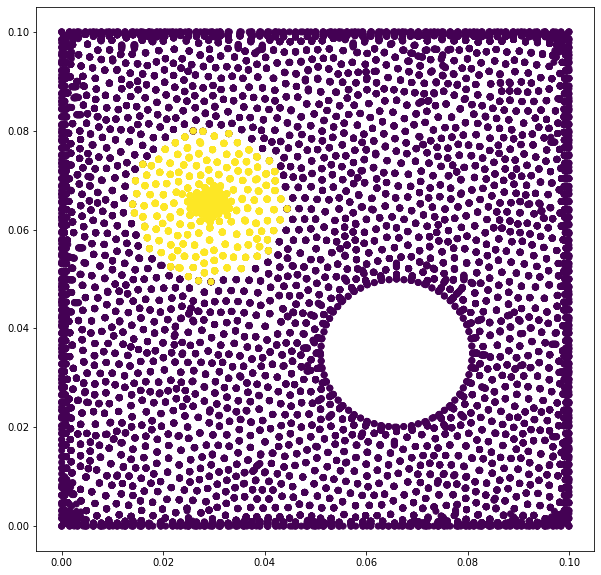

In [31]:
animation = RolloutAnimation(ro)
plt.show()

In [23]:
ro.data.pos[:, :2].T

tensor([[0.0290, 0.0810, 0.1000,  ..., 0.0997, 0.0969, 0.0006],
        [0.0650, 0.0350, 0.0000,  ..., 0.0491, 0.0007, 0.0918]],
       dtype=torch.float64)